<a href="https://colab.research.google.com/github/nedokormysh/GB_intro_NN/blob/lesson4/GB_NN_intro_hw_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Попробовать улучшить точность распознования образов cifar 10 сверточной нейронной сетью, рассмотренной на уроке. Приложить анализ с описанием того, что улучшает работу нейронной сети и что ухудшает.

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam, Nadam
from numpy import asarray
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import GlobalMaxPooling2D
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

In [ ]:
# pip install tensorflow-gpu

In [2]:
import tensorflow
tensorflow.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# разделение тренировочной и тестовой выборки
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')

170498071/170498071 [==============================] - 14s 0us/step
X_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [ ]:
y_test_show = y_test.copy()
class_names = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

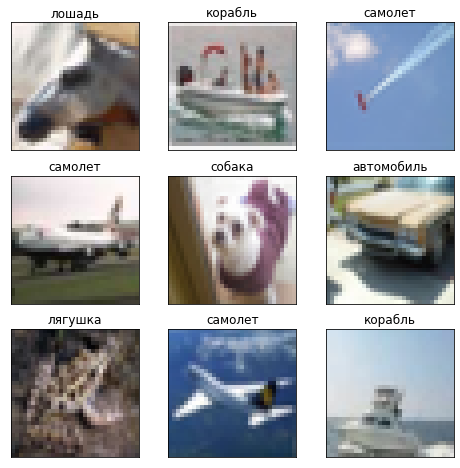

In [ ]:
plt.figure(figsize=(7, 7))
for i in range(9):
  ind = np.random.randint(0, X_train.shape[0])
  plt.subplot(330 + 1 + i)
  plt.imshow(X_train[ind])
  plt.xticks([])
  plt.yticks([])
  plt.title(class_names[y_train[ind][0]])
  plt.grid(False)

In [4]:
# нормализация
x_train = X_train.astype('float32')
x_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# OH кодирование
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
def cnn_test(            
            X_train: pd.DataFrame,
            y_train: pd.DataFrame,
            X_test: pd.DataFrame,
            y_test: pd.DataFrame,
            n_classes: int = 10,
            n_layers: int = 2,  # число слоёв свертка-пулинг 
            kernel_size: int = 5,
            filter_num: int = 20,
            n_epochs: int = 1500,
            batch_size: int = 1000,
            activation: str = 'Relu',
            optimizer=Adam(learning_rate=0.001)
          ):

  # установка параметров нейросети
  batch_size = batch_size
  n_classes = n_classes
  n_epochs = n_epochs

  model = Sequential()
  # слои нейросети отвественные за свертку и max-pooling
  model.add(Conv2D(filter_num, (kernel_size, kernel_size), padding='same',
                   input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2))),
  model.add(Dropout(0.25))

  if n_layers == 2:
        model.add(Conv2D(filter_num*2, (kernel_size, kernel_size)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

  if n_layers == 3:
        model.add(Conv2D(filter_num*3, (kernel_size, kernel_size), padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

  if n_layers == 4:
        model.add(Conv2D(filter_num*4, (kernel_size, kernel_size), padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.35))

  if n_layers >= 5:
        model.add(Conv2D(filter_num*5, (kernel_size, kernel_size), padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.40))

  # полносвязные слои нейронной сети
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(n_classes))
  model.add(Activation('softmax'))

  model.compile(optimizer=optimizer,
                  loss=categorical_crossentropy, metrics=['accuracy'])
  
  model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
              validation_data=(X_test, y_test), verbose=0)
  
  return model

## Зависимость от количества фильтров.

In [ ]:
# тест влияния количества фильтров(ядер) на модель (два слоя (свертка-пулинг)- размер ядра -5х5)
# настравиватеся только количество ядер первой свертки
# далее количество фильтров увеличивается пропорционально от свертки к свертке
n = 80
x = np.arange(1, n + 1, 1)
result_dict_acc = {}
result_dict_loss = {}
for kernels in [8, 16, 32, 64]:
    model_2_5 = cnn_test(
        X_train,
        y_train,
        X_test,
        y_test,
        n_classes=10,
        n_layers=2,  
        kernel_size=5,
        filter_num=kernels,
        n_epochs=n,
        batch_size=3000,
        activation='Relu',
        optimizer=Adam(learning_rate=0.001)        
    )

    result_dict_acc[f'accuracy_{kernels}_kerneles'] = model_2_5.history.history['val_accuracy']
    result_dict_loss[f'loss_{kernels}_kerneles'] = model_2_5.history.history['val_loss']

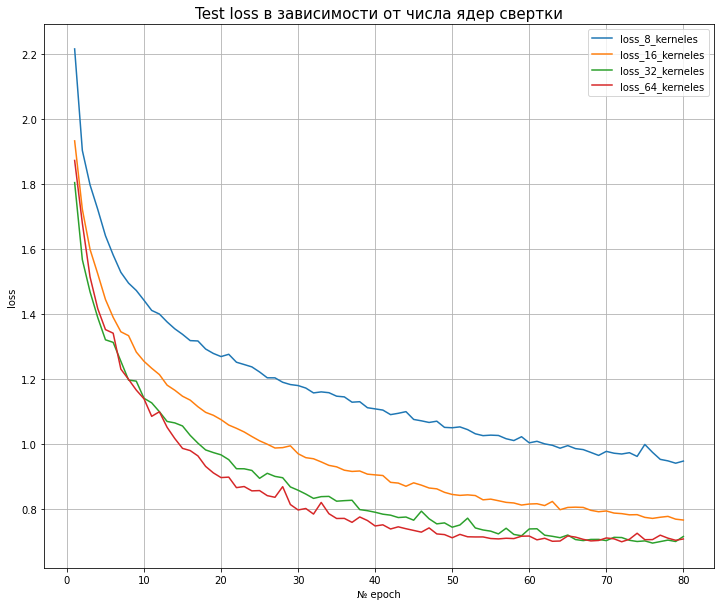

In [ ]:
plt.figure(figsize=(12, 10))
for kernels in result_dict_loss:
  plt.plot(x, result_dict_loss[kernels], label=kernels)
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('loss')
plt.title('Test loss в зависимости от числа ядер свертки', size=15)
plt.show()

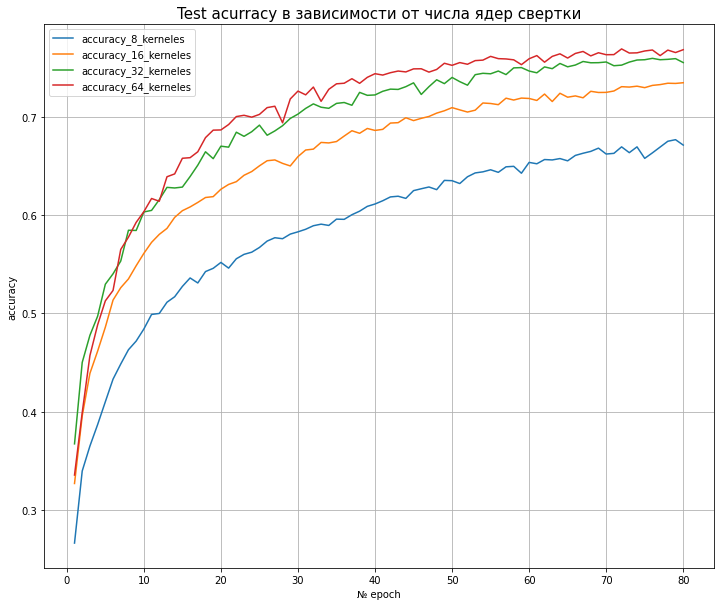

In [ ]:
plt.figure(figsize=(12, 10))
for kernels in result_dict_acc:
    plt.plot(x, result_dict_acc[kernels], label=kernels)
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Test acurracy в зависимости от числа ядер свертки', size=15)
plt.show()

Видно, что увеличение количества фильтров на входе улучшает качество модели. Но больше 32 нет смысла.

## Зависимость от размера ядра свёртки

In [ ]:
result_dict_acc = {}
result_dict_loss = {}
for kernel_size in [2, 3, 5, 10]:
    model_2_5 = cnn_test(
        X_train,
        y_train,
        X_test,
        y_test,
        n_layers=2,  
        kernel_size=kernel_size,
        filter_num=32,
        n_epochs=80,
        batch_size=3000,
        activation='Relu',
        optimizer=Adam(learning_rate=0.001),
    )

    result_dict_acc[f'accuracy_{kernel_size}_kernel_size'] = model_2_5.history.history['val_accuracy']
    result_dict_loss[f'loss_{kernel_size}_kernel_size'] = model_2_5.history.history['val_loss']

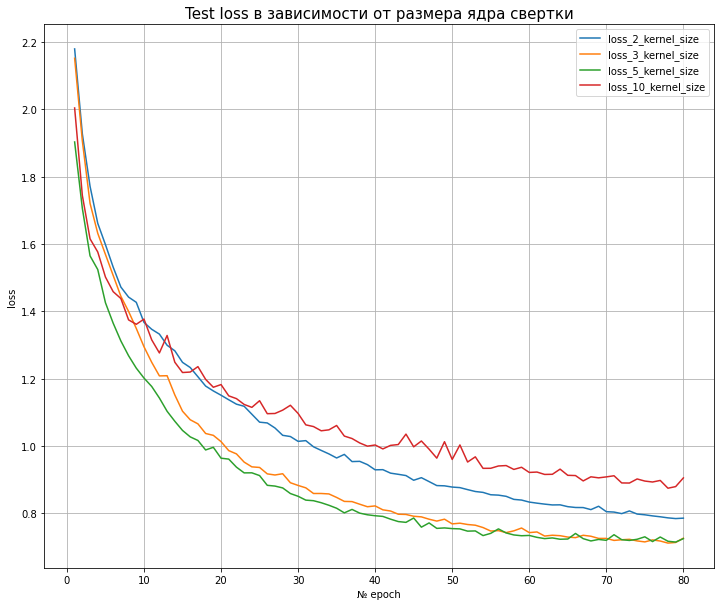

In [ ]:
n = 80
x = np.arange(1, n + 1, 1)
plt.figure(figsize=(12, 10))
for kernel_size in result_dict_loss:
    plt.plot(x, result_dict_loss[kernel_size], label=kernel_size)
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('loss')
plt.title('Test loss в зависимости от размера ядра свертки', size=15)
plt.show()

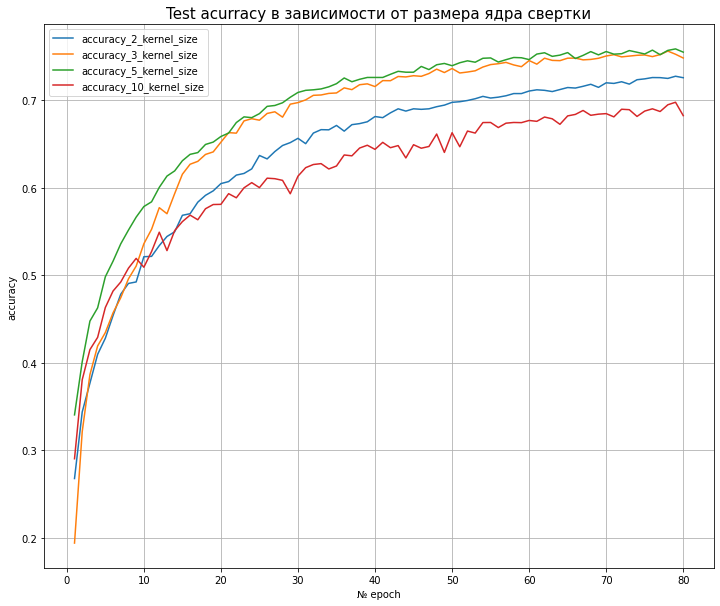

In [ ]:
plt.figure(figsize=(12, 10))
for kernel_size in result_dict_acc:
    plt.plot(x, result_dict_acc[kernel_size], label=kernel_size)
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Test acurracy в зависимости от размера ядра свертки', size=15)
plt.show()

Оптимальным значением размера ядра свёртки является 5

## Зависимость от количества слоёв

In [ ]:
result_dict_acc = {}
result_dict_loss = {}
for n_layers in [1, 2, 3, 4, 5]:
    model_2_5 = cnn_test(
        X_train,
        y_train,
        X_test,
        y_test,
        n_layers=n_layers,  # число сверточных слоев (свертка-пулинг)
        kernel_size=5,
        filter_num=32,
        n_epochs=80,
        batch_size=3000,
        activation='Relu',
        optimizer=Adam(learning_rate=0.001),
    )

    result_dict_acc[f'accuracy_{n_layers}_layers'] = model_2_5.history.history['val_accuracy']
    result_dict_loss[f'loss_{n_layers}_layers'] = model_2_5.history.history['val_loss']

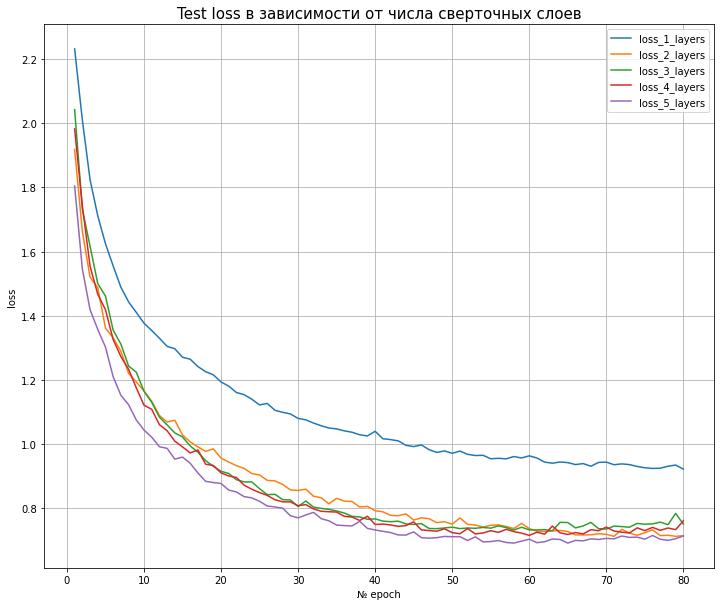

In [ ]:
n = 80
x = np.arange(1, n + 1, 1)
plt.figure(figsize=(12, 10))
for layers in result_dict_loss:
    plt.plot(x, result_dict_loss[layers], label=layers)
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('loss')
plt.title('Test loss в зависимости от числа сверточных слоев', size=15)
plt.show()

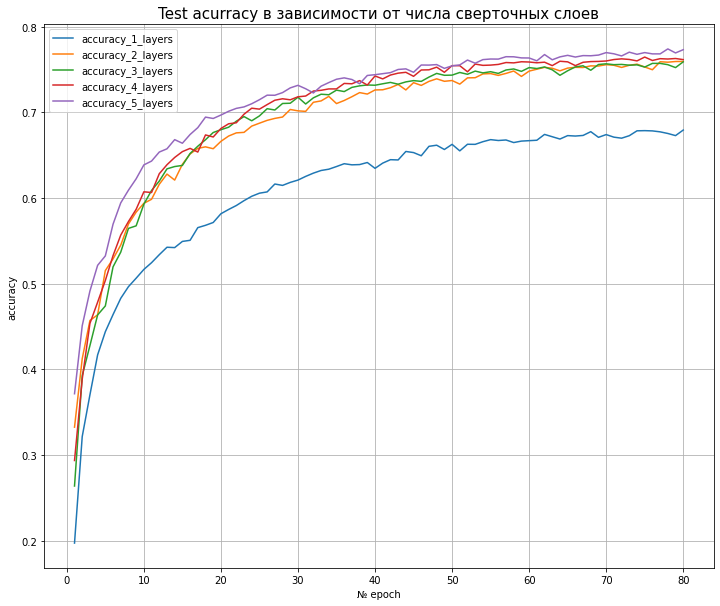

In [ ]:
plt.figure(figsize=(12, 10))
for layers in result_dict_acc:
    plt.plot(x, result_dict_acc[layers], label=layers)
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Test acurracy в зависимости от числа сверточных слоев', size=15)
plt.show()

Видим рост качества модели в зависимости от числа слоёв. Но качество не улучшается безгранично.

## Зависимость от оптимизатора

In [6]:
optimizers = [SGD, Adagrad, RMSprop, Adam, Nadam]
result_dict_acc = {}
result_dict_loss = {}

for optim in optimizers:
    model_2_5 = cnn_test(
        X_train,
        y_train,
        X_test,
        y_test,
        n_layers=5,  
        kernel_size=5,
        filter_num=32,
        n_epochs=80,
        batch_size=3000,
        activation='Relu',
        optimizer=optim(learning_rate=0.001),
    )
    
    result_dict_acc[f'accuracy_{optim}'] = model_2_5.history.history['val_accuracy']
    result_dict_loss[f'loss_{optim}'] = model_2_5.history.history['val_loss']

In [54]:
# result_dict_loss["loss_<class 'keras.optimizers.optimizer_v2.gradient_descent.SGD'>_layers"][79]


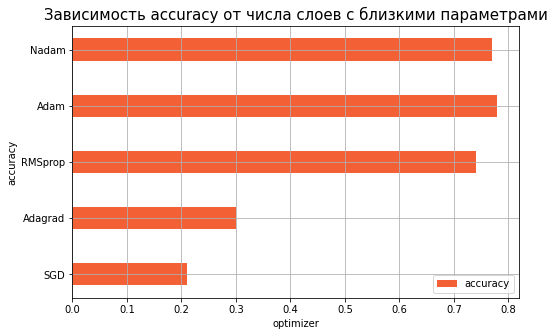

In [62]:
optmzs = ['SGD', 'Adagrad', 'RMSprop', 'Adam', 'Nadam']

res_acc = [round(result_dict_acc[optim][79], 2) for optim in result_dict_acc]
# res_loss = [round(result_dict_loss[optim][79], 2) for optim in result_dict_loss]

plt.figure(figsize=(8, 5))

plt.barh(optmzs, res_acc, label='accuracy', color='#F46036', height=0.4)
# plt.barh(optmzs, res_loss, label='loss', color='#0CA4A5', height=0.4, align='edge')

plt.title('Зависимость accuracy от числа слоев с близкими параметрами', size=15)
plt.grid()
plt.xlabel('optimizer')
plt.ylabel('accuracy')
plt.legend()
plt.show()

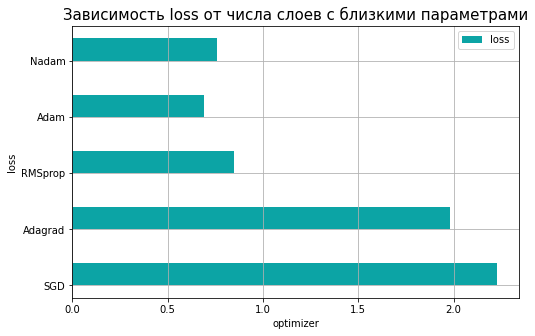

In [61]:
optmzs = ['SGD', 'Adagrad', 'RMSprop', 'Adam', 'Nadam']

# res_acc = [round(result_dict_acc[optim][79], 2) for optim in result_dict_acc]
res_loss = [round(result_dict_loss[optim][79], 2) for optim in result_dict_loss]

plt.figure(figsize=(8, 5))

# plt.barh(optmzs, res_acc, label='accuracy', color='#F46036', height=0.4)
plt.barh(optmzs, res_loss, label='loss', color='#0CA4A5', height=0.4, align='edge')

plt.title('Зависимость loss от числа слоев с близкими параметрами', size=15)
plt.grid()
plt.xlabel('optimizer')
plt.ylabel('loss')
plt.legend()
plt.show()

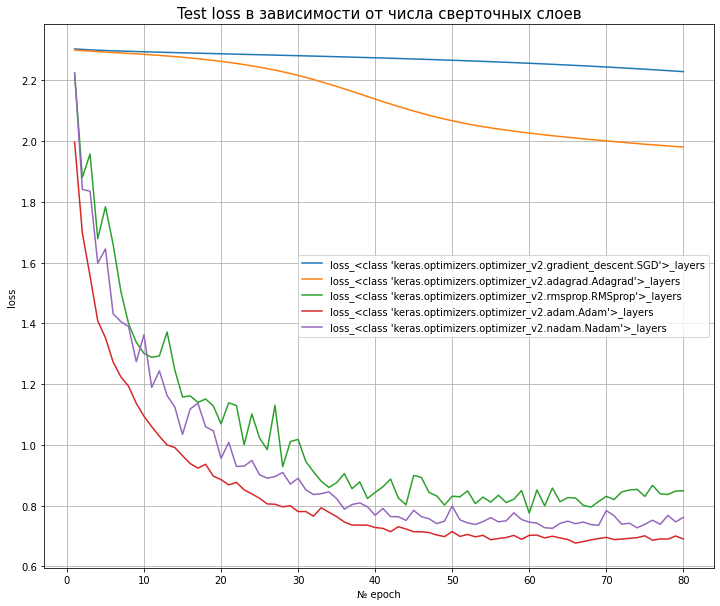

In [10]:
n = 80
x = np.arange(1, n + 1, 1)

plt.figure(figsize=(12, 10))
for optim in result_dict_loss:
    plt.plot(x, result_dict_loss[optim], label=optim)
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('loss')
plt.title('Test loss в зависимости от числа сверточных слоев', size=15)
plt.show()

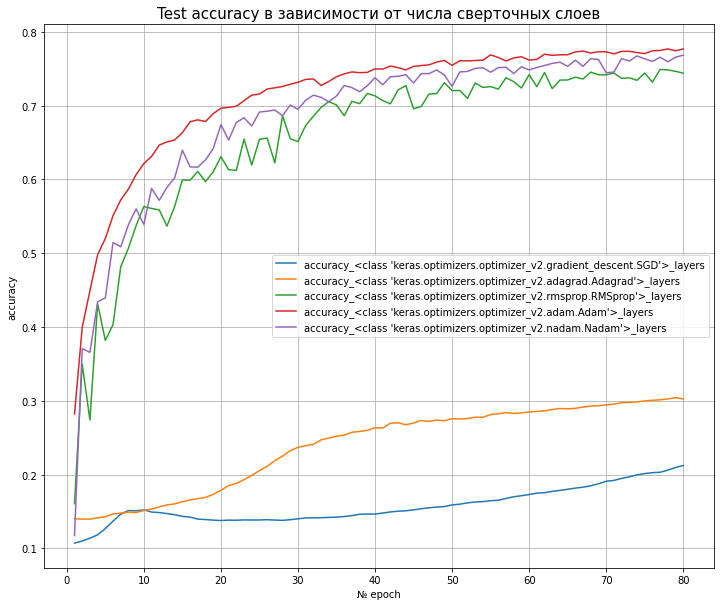

In [56]:
plt.figure(figsize=(12, 10))
for optim in result_dict_acc:
    plt.plot(x, result_dict_acc[optim], label=optim)
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Test accuracy в зависимости от числа сверточных слоев', size=15)
plt.show()

Можем наблюдать, что с заданными параметрами лучше всех справился оптимизатор Adam, а sgd и adagard не успели сойтись.

## Финальный вариант

In [64]:
# финальный вариант
model = cnn_test(
    X_train,
    y_train,
    X_test,
    y_test,
    n_layers=5, 
    kernel_size=5,
    filter_num=32,
    n_epochs=80,
    batch_size=3000,
    activation='Relu',
    optimizer=Adam(learning_rate=0.001),
)

test_score = model.evaluate(X_test, y_test)
# print("Test loss {:.4f}, accuracy {:.2f}%".format(
#     test_score[0], test_score[1] * 100))

print(f'Test loss {round(test_score[0], 2)}, accuracy {round(test_score[1] * 100, 2)}')

313/313 [==============================] - 1s 3ms/step - loss: 0.7426 - accuracy: 0.7603
Test loss 0.74, accuracy 76.03


In [ ]:
y_pred = model.predict(X_test)
y_lbl = np.argmax(y_pred, axis=1)

2. Описать также в анализе какие необоходимо внести изменения  в получившуюся у вас нейронную сеть если бы ей нужно было работать не с cifar10, а с MNIST, CIFAR100 и IMAGENET.

Если не проводить тесты, то предподложительно для других нейронных сетей для работы потребуются менять количество классов, количество ядер. (как мне кажется для mnist должно потребоваться меньшее количество ядер, т.к. там более потребуется искать более простые зависимости). Также для улучшения можно провести аугментацию данных.